# Credit Card fraudulent_Trans Detection Using ML

## Importing Main Libraries

In [49]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

## Model
from sklearn.linear_model import LogisticRegression

## Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import  confusion_matrix, classification_report

In [4]:
## Loading The DataSet
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
# dataset informations
df.shape

(170463, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,...,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000
mean,60945.692185,-0.171418,0.041438,0.496009,0.118163,-0.177346,0.058682,-0.081195,0.032564,0.019095,...,-0.028654,-0.084279,-0.022592,0.009210,0.092750,0.012698,0.002063,0.002476,87.323837,0.002112
std,27706.565970,1.850499,1.611466,1.382129,1.371813,1.338482,1.295161,1.208874,1.228228,1.152669,...,0.743809,0.667001,0.584789,0.598609,0.465168,0.490741,0.392259,0.307549,246.031624,0.045907
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41172.500000,-0.987177,-0.538322,-0.061200,-0.742708,-0.829775,-0.690531,-0.586555,-0.162257,-0.660021,...,-0.230739,-0.546821,-0.170281,-0.332191,-0.195154,-0.330339,-0.065088,-0.026686,5.470000,0.000000
50%,60665.000000,-0.185295,0.110233,0.625232,0.124920,-0.227397,-0.202146,-0.032314,0.056915,-0.079157,...,-0.054634,-0.067189,-0.036388,0.059690,0.136222,-0.059032,0.008744,0.021198,21.860000,0.000000
75%,78493.000000,1.183845,0.804500,1.298406,0.938294,0.372807,0.449766,0.462061,0.351272,0.641997,...,0.127892,0.362294,0.098484,0.415848,0.399693,0.273055,0.089745,0.078337,76.677500,0.000000
max,120194.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
#checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
# distribution of Legal_Transimate(0) transactions & fraudulent_Transulent(1) transactions
df['Class'].value_counts()

Class
0.0    170102
1.0       360
Name: count, dtype: int64

In [10]:
Legal_Trans = df[df['Class']==0]
fraudulent_Trans = df[df['Class']==1]

In [11]:
Legal_Trans.shape

(170102, 31)

In [12]:
Legal_Trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170102 entries, 0 to 170461
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170102 non-null  float64
 1   V1      170102 non-null  float64
 2   V2      170102 non-null  float64
 3   V3      170102 non-null  float64
 4   V4      170102 non-null  float64
 5   V5      170102 non-null  float64
 6   V6      170102 non-null  float64
 7   V7      170102 non-null  float64
 8   V8      170102 non-null  float64
 9   V9      170102 non-null  float64
 10  V10     170102 non-null  float64
 11  V11     170102 non-null  float64
 12  V12     170102 non-null  float64
 13  V13     170102 non-null  float64
 14  V14     170102 non-null  float64
 15  V15     170102 non-null  float64
 16  V16     170102 non-null  float64
 17  V17     170102 non-null  float64
 18  V18     170102 non-null  float64
 19  V19     170102 non-null  float64
 20  V20     170102 non-null  float64
 21  V21     170102 

In [13]:
Legal_Trans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,...,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.0
mean,60954.436285,-0.159027,0.032193,0.513948,0.108071,-0.168484,0.061850,-0.066521,0.031054,0.025195,...,-0.030393,-0.084402,-0.022560,0.009386,0.092777,0.012642,0.001681,0.002371,87.272509,0.0
std,27700.464110,1.800808,1.586934,1.275396,1.348610,1.299898,1.291401,1.110218,1.174940,1.139335,...,0.714809,0.663248,0.579742,0.598814,0.464025,0.490827,0.386213,0.306669,246.067820,0.0
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.0
25%,41184.250000,-0.983325,-0.539803,-0.055639,-0.744883,-0.826722,-0.688739,-0.583796,-0.162266,-0.656750,...,-0.230786,-0.546778,-0.170051,-0.332048,-0.195006,-0.330422,-0.065101,-0.026540,5.490000,0.0
50%,60679.500000,-0.180525,0.108242,0.627623,0.121950,-0.226052,-0.201107,-0.031108,0.056618,-0.077653,...,-0.055003,-0.067422,-0.036307,0.059760,0.136232,-0.059108,0.008634,0.021165,21.890000,0.0
75%,78488.000000,1.184327,0.799852,1.299770,0.932687,0.373315,0.450665,0.462847,0.349979,0.644227,...,0.126834,0.361878,0.098302,0.415964,0.399578,0.272779,0.089291,0.078028,76.500000,0.0
max,120194.000000,2.439207,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,18.709255,15.594995,...,22.614889,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,0.0


In [14]:
fraudulent_Trans.shape

(360, 31)

In [15]:
fraudulent_Trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 541 to 167305
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    360 non-null    float64
 1   V1      360 non-null    float64
 2   V2      360 non-null    float64
 3   V3      360 non-null    float64
 4   V4      360 non-null    float64
 5   V5      360 non-null    float64
 6   V6      360 non-null    float64
 7   V7      360 non-null    float64
 8   V8      360 non-null    float64
 9   V9      360 non-null    float64
 10  V10     360 non-null    float64
 11  V11     360 non-null    float64
 12  V12     360 non-null    float64
 13  V13     360 non-null    float64
 14  V14     360 non-null    float64
 15  V15     360 non-null    float64
 16  V16     360 non-null    float64
 17  V17     360 non-null    float64
 18  V18     360 non-null    float64
 19  V19     360 non-null    float64
 20  V20     360 non-null    float64
 21  V21     360 non-null    float64
 22  V2

In [16]:
fraudulent_Trans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0
mean,56649.477778,-6.026758,4.406926,-7.976571,4.889177,-4.367960,-1.436827,-7.017053,0.745264,-2.863575,...,0.793171,-0.025930,-0.037556,-0.073778,0.080099,0.038996,0.182902,0.052482,111.576722,1.0
std,30063.244692,7.413373,4.542492,8.011020,2.987266,5.690760,2.011672,7.844209,7.853881,2.732409,...,4.463064,1.675778,1.768506,0.486284,0.848465,0.448146,1.533450,0.590092,227.309252,0.0
min,406.000000,-30.552380,-6.976420,-31.103685,-1.313275,-22.105532,-5.430971,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-1.632653,-4.781606,-1.123534,-7.263482,-1.869290,0.000000,1.0
25%,34605.750000,-8.748832,1.343134,-12.371436,2.636391,-7.025001,-2.732659,-11.543207,-0.141823,-4.342895,...,0.005900,-0.550498,-0.397766,-0.403800,-0.299065,-0.263621,-0.031367,-0.171691,1.000000,1.0
50%,55462.500000,-3.217167,3.260330,-5.347642,4.430873,-2.493640,-1.484754,-4.320997,0.758219,-2.454143,...,0.688066,0.056418,-0.098657,-0.024949,0.109192,-0.030263,0.418223,0.150454,11.385000,1.0
75%,84717.750000,-1.090946,6.521042,-1.935497,6.668638,-0.529055,-0.357240,-1.581994,2.723117,-0.786085,...,1.726841,0.554812,0.346510,0.300697,0.522408,0.387482,1.136721,0.389406,104.007500,1.0
max,118603.000000,1.954852,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,1.246604,3.052358,1.779364,1809.680000,1.0


In [17]:
##Now taking only the no. of Legal_Transimate records which matches with our fraudulent_Trans records to make it balanced dataset
## This Making The volume Of Two Classes are Equal and Balance The Data
legal_sample=Legal_Trans.sample(n=492)


In [19]:
New_df=pd.concat([legal_sample,fraudulent_Trans],axis=0)
New_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73949,55356.0,-0.728601,1.241001,0.897491,0.130805,-0.360663,-1.073662,0.290993,0.409405,-0.417662,...,-0.223301,-0.784058,0.070969,0.306467,-0.166230,0.076770,0.112077,0.026406,11.96,0.0
153550,99413.0,-0.586644,0.269939,-0.277920,1.163828,0.287455,0.258962,2.480946,-0.453401,0.609340,...,0.120552,0.423812,0.420350,-0.515759,0.079522,-0.445175,0.121896,0.021216,339.59,0.0
98650,66749.0,1.002226,-0.503839,0.898915,0.914931,-1.070988,-0.126840,-0.447347,0.173496,0.847273,...,-0.047068,-0.049890,-0.102108,0.595762,0.395936,0.492899,-0.028643,0.015810,79.90,0.0
135001,81067.0,1.391746,-1.221035,0.644530,-1.281513,-1.842066,-0.920879,-1.051192,-0.150347,-1.634384,...,-0.342779,-0.799998,0.138067,0.309865,0.085157,-0.413418,0.027546,0.038090,70.00,0.0
127331,78294.0,-1.124043,1.872433,1.585074,2.603394,-0.382657,-0.033383,0.237768,0.454016,-1.183639,...,-0.220113,-0.450080,0.085041,0.464262,-0.403004,-0.082067,0.302589,0.020832,7.96,0.0


In [58]:
New_df.shape

(852, 31)

In [21]:
## Checking The Sampling
New_df['Class'].value_counts()

Class
0.0    492
1.0    360
Name: count, dtype: int64

## Splitiing dataset

In [24]:
X=New_df.drop('Class',axis=1)
y=New_df['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) 
#stratify =y means same no. of values in X_train and y_train and in X_test & y_test

In [26]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(681, 30) (681,) (171, 30) (171,)


## Building Model

### Define Hyperparameters for Grid Search

In [30]:
# Define a range of hyperparameter values for 'C' to test

params = {'C': [0.01, 0.1, 1, 10, 100]}

#Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.

In [31]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=100000)  # max_iter increased for convergence

### Perform Grid Search for Hyperparameter(C) Tuning
We will use GridSearchCV to test all possible values of 'C' and find the best one based on cross-validation performance.

In [34]:
from sklearn.model_selection import GridSearchCV
log_reg= GridSearchCV(estimator=logreg ,param_grid=params ,scoring='accuracy' ,cv=5)  #performance metric we take accuracy_Score

Choosing cv=5 for cross-validation is a practical choice that balances the trade-offs between having enough folds to provide a reliable estimate of model performance and not overburdening the computational resources. It is widely used and generally provides a good compromise between bias, variance, and computational efficiency.

In [37]:
# Fit the model to the training data
log_reg.fit(X_train,y_train)

C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [38]:
log_reg.best_params_

{'C': 10}

In [39]:
log_reg.best_score_
#Example: If log_reg.best_score_ = 0.85, it means the model achieved 85% accuracy during cross-validation.

0.9500644053241734

In [40]:
'''
Why tune C?
Improves Generalization: Proper tuning of C helps the model generalize better to unseen data by finding the right balance between fitting the training data and regularization.
Optimizes Performance: Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.

Summary:
We didn't tune C in the initial demonstration for simplicity. In practice, hyperparameter tuning using methods like GridSearchCV is essential for optimizing model performance.
'''

"\nWhy tune C?\nImproves Generalization: Proper tuning of C helps the model generalize better to unseen data by finding the right balance between fitting the training data and regularization.\nOptimizes Performance: Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.\n\nSummary:\nWe didn't tune C in the initial demonstration for simplicity. In practice, hyperparameter tuning using methods like GridSearchCV is essential for optimizing model performance.\n"

### Prediction on test data

In [42]:
#Make predictions on the test set
y_pred=log_reg.predict(X_test)

### Evaluate the model using performance metrics i.e. accuracy, confusion matrix, and classification report 

In [51]:
### Evaluate the model using accuracy, confusion matrix, and classification report

## accuracy& precision & Recall & ROC_AUC
accuracy = accuracy_score(y_test, y_pred)
precision_test= precision_score(y_test,y_pred)
recall_test= recall_score(y_test,y_pred)
roc_auc_test= roc_auc_score(y_test,y_pred)

print(f'Accuracy on Test Data : {accuracy:0.2f}')
print(f'Precision on Test Data : {precision_test:0.2f}')
print(f'Recall on Test Data : {recall_test:0.2f}')
print(f'ROC_AUC on Test Data : {roc_auc_test:0.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on Test Data : 0.95
Precision on Test Data : 0.97
Recall on Test Data : 0.92
ROC_AUC on Test Data : 0.95

Confusion Matrix:
[[97  2]
 [ 6 66]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        99
         1.0       0.97      0.92      0.94        72

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [53]:
### Visualize the confusion matrix using heatmap

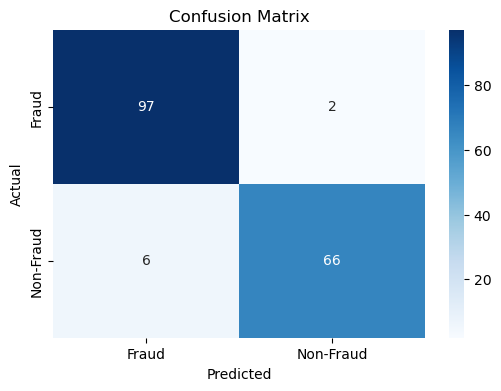

In [55]:

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud', 'Non-Fraud'], yticklabels=['Fraud', 'Non-Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()